<a href="https://colab.research.google.com/github/yeonheuiyeon/Machine-Learning-Practice/blob/master/exercise2_heuiyeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. 라이브러리 설치하기

In [4]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

###2. 데이터 고르고, 가져오기
- 옥스퍼드 데이터로 37개의 애완동물 사진 (25개의 개, 12개의 고양이)


untar_data는 넘겨받은 url에 있는 데이터를 다운받은 후 압축을 풀어준다. 그 후 파이썬 PATH 객체를 리턴하게 된다.

In [8]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [9]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [10]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [12]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_99.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_74.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_141.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_33.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_148.jpg')]

파일 경로에 라벨이 포함되어 있는 경우는 라벨을 추출하여 이미지와 연결시켜 주어야한다.

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

* 정규표현식의 개념
정규표현식은 줄여서 정규식(영어로는 Regular Expression이고 줄여서 Regex, Regexp 등으로 불린다.) 이라고도 하는데, 컴퓨터 과학의 정규언어로부터 유래한 것으로 특정한 규칙을 가진 문자열의 집합을 표현하기 위해 쓰이는 형식언어이다.



###3.데이타 로딩
- nomalization이 중요한이유
피겔값은 0~255이고 일반적으로 3가지 컬러채널(R,G,B) 임. 어떤것은 다양하고 그렇지 않은 경우도 있음 평균이 0이고 표준편차가 1인 픽셀값을 모두 가질경우 학습에 도움이 됨.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/vision/data.py:306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


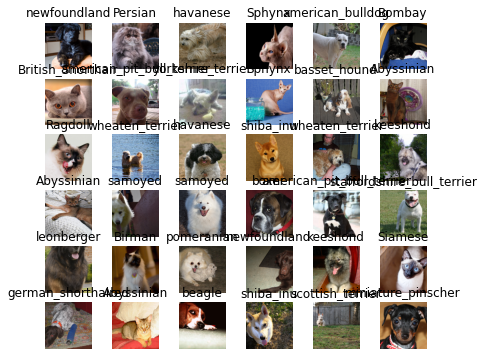

In [16]:
data.show_batch(rows=6, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

###4.RESNET 구조로 학습시키기

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

- 전체 데이터 집합을 몇번 통과할지의 정수를 ()안에 넣어준다. 하지만 많이 돌리게 되면 오버핏을 하게될 경우가 있다. 따라서 적합한 정수를 넣어주어야 한다.

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.374505,0.306502,0.096752,01:29
1,0.607637,0.265951,0.089986,01:30
2,0.385789,0.223381,0.071719,01:28
3,0.283329,0.210538,0.068336,01:27


In [0]:
learn.save('stage-1')

###5. 결과 분석하기

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

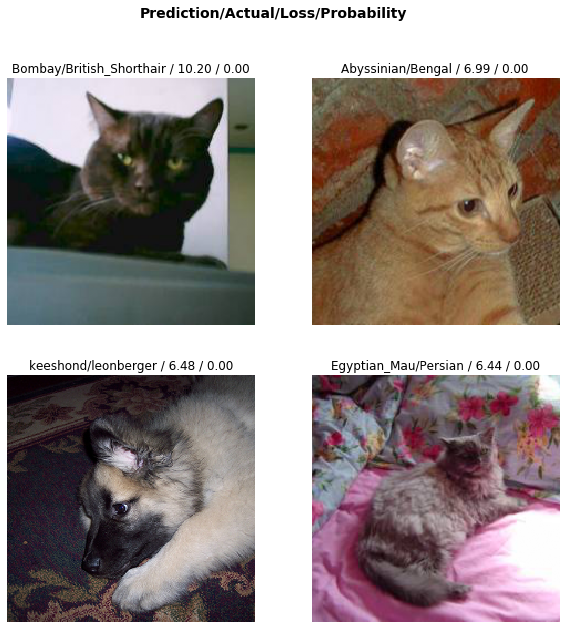

In [0]:
interp.plot_top_losses(4, figsize=(10,10))

- ()안에 콤마 앞에는 몇개의 사진이 나올건지, 뒤에는 화면비율

In [0]:
doc(interp.plot_top_losses)

- 오차행렬(Confusion matrix)는 실제 a와 b라는 값이 있다면 a,b일것이라는 예측모델을 정확한지 평가하는 것이다.

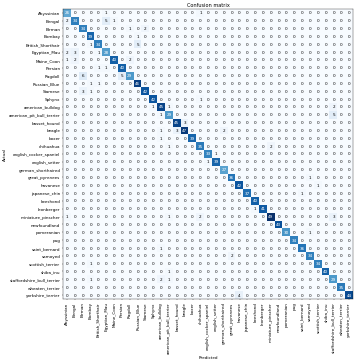

In [0]:
interp.plot_confusion_matrix(figsize=(18,12), dpi=30)

In [0]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Ragdoll', 'Persian', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

In [0]:
learn.unfreeze()

- 트레이닝을 계속 하기 위해서는 unfreeze 하여 가중치 사이 균형 조절과 부정확한 예측을 방지해야한다

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.687591,0.393395,0.128552,01:29


In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


-  매우 작은 lr에서부터 점점 키워가며 진행하고 그 loss들을 기록해놓은 다음에 loss가 지속해서 감소하는 과정에 있는 lr들 중에서 가장 큰 lr을 찾는 것이다. 직관적으로 봤을 때, loss가 계속 감소한다는 것은 수렴을 향해 간다는 것이고, 그 중에서 가장 큰 lr을 찾는 것은 수렴 속도를 빠르게 하기 위함이다.

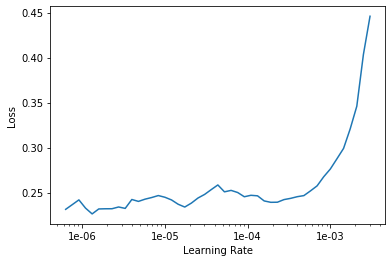

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.232673,0.204134,0.062246,01:29
1,0.232054,0.195640,0.062923,01:30


In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

###6. RESNET50 으로 학습해보기

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


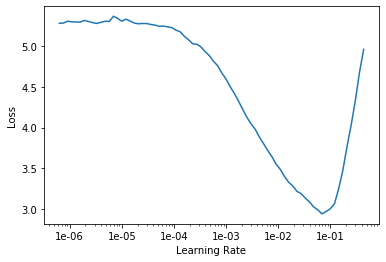

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.724668,0.316938,0.100135,02:24
1,0.537678,0.285575,0.089310,02:24
2,0.423648,0.285964,0.087957,02:24
3,0.354840,0.209503,0.065629,02:21
4,0.231477,0.184367,0.052097,02:20
5,0.197846,0.162723,0.051421,02:20
6,0.132136,0.151102,0.047361,02:20
7,0.100760,0.151587,0.046685,02:21


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.108050,0.154912,0.048714,02:39
1,0.101125,0.140344,0.041949,02:38
2,0.078944,0.141307,0.046685,02:38


###7. MNIST 데이터로 학습해보기

In [17]:
path = untar_data(URLs.MNIST_SAMPLE); path
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

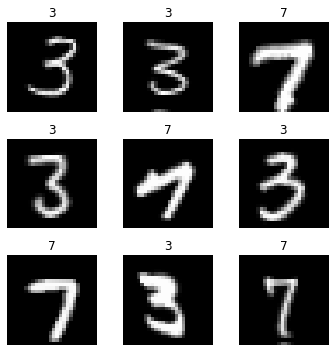

In [0]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.200718,0.105012,0.957802,00:20
1,0.116606,0.047127,0.984789,00:19


In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

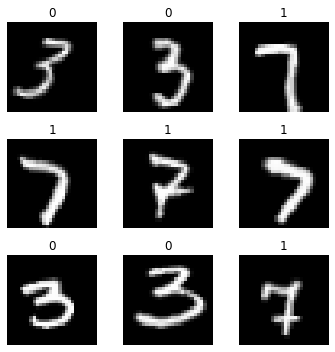

In [0]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [0]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']